## Bank Customer Churn

#### Dataset xếp hạng people by churn or not churn, goal là predict which customers will churn.

#### Dataset có 10000 dòng ​​and 18 features.

In [ ]:
import numpy as np 
import pandas as pd

#### Importing Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Importing Dataset

In [4]:
df = pd.read_csv('data/Customer-Churn-Records.csv')

#### categorical & continuous variables, không có null values.

- RowNumber: Số thứ tự của từng hàng, không ảnh hưởng đến kết quả đầu ra.
- CustomerId: Chứa các giá trị ngẫu nhiên và không ảnh hưởng đến việc khách hàng rời ngân hàng.
- Surname: Họ của khách hàng, không tác động đến quyết định rời ngân hàng của họ.
- CreditScore: Có thể ảnh hưởng đến việc khách hàng rời đi, vì khách hàng có điểm tín dụng cao thường ít có khả năng rời ngân hàng hơn.
- Geography: Vị trí địa lý của khách hàng có thể ảnh hưởng đến quyết định rời ngân hàng của họ.
- Gender: Thật thú vị khi xem xét liệu giới tính có vai trò gì trong việc khách hàng rời ngân hàng hay không.
- Age: Chắc chắn có liên quan, vì khách hàng lớn tuổi thường ít rời ngân hàng hơn so với những người trẻ tuổi.
- Tenure: Chỉ số năm mà khách hàng đã là khách hàng của ngân hàng. Thông thường, khách hàng lâu năm trung thành hơn và ít có khả năng rời đi.
- Balance: Cũng là một chỉ số rất tốt về việc khách hàng rời đi, vì những người có số dư tài khoản cao thường ít rời ngân hàng hơn so với những người có số dư thấp.
- NumOfProducts: Số lượng sản phẩm mà khách hàng đã mua qua ngân hàng.
- HasCrCard: Cho biết khách hàng có thẻ tín dụng hay không. Cột này cũng quan trọng, vì những người có thẻ tín dụng ít có khả năng rời ngân hàng hơn.
- IsActiveMember: Khách hàng tích cực thường ít rời ngân hàng hơn.
- EstimatedSalary: Tương tự như số dư, những người có lương thấp có khả năng rời ngân hàng cao hơn so với những người có lương cao.
- Exited: Khách hàng có rời ngân hàng hay không.
- Complain: Khách hàng có khiếu nại hay không.
- Satisfaction Score: Điểm hài lòng do khách hàng cung cấp về việc giải quyết khiếu nại của họ.
- Card Type: Loại thẻ mà khách hàng đang sở hữu.
- Points Earned: Điểm mà khách hàng kiếm được khi sử dụng thẻ tín dụng.

In [100]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [8]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [9]:
(df.isnull().sum()/len(df))

RowNumber             0.0
CustomerId            0.0
Surname               0.0
CreditScore           0.0
Geography             0.0
Gender                0.0
Age                   0.0
Tenure                0.0
Balance               0.0
NumOfProducts         0.0
HasCrCard             0.0
IsActiveMember        0.0
EstimatedSalary       0.0
Exited                0.0
Complain              0.0
Satisfaction Score    0.0
Card Type             0.0
Point Earned          0.0
dtype: float64

## 2. Data Analysis

#### Xác minh mối tương quan giữa các biến
- Khi xem xét mối tương quan giữa các biến, có thể thấy biến mục tiêu có tương quan 100% với biến Complain, nên sẽ loại bỏ biến Complain

/tmp/ipykernel_32/3688917451.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().round(2)


<Axes: >

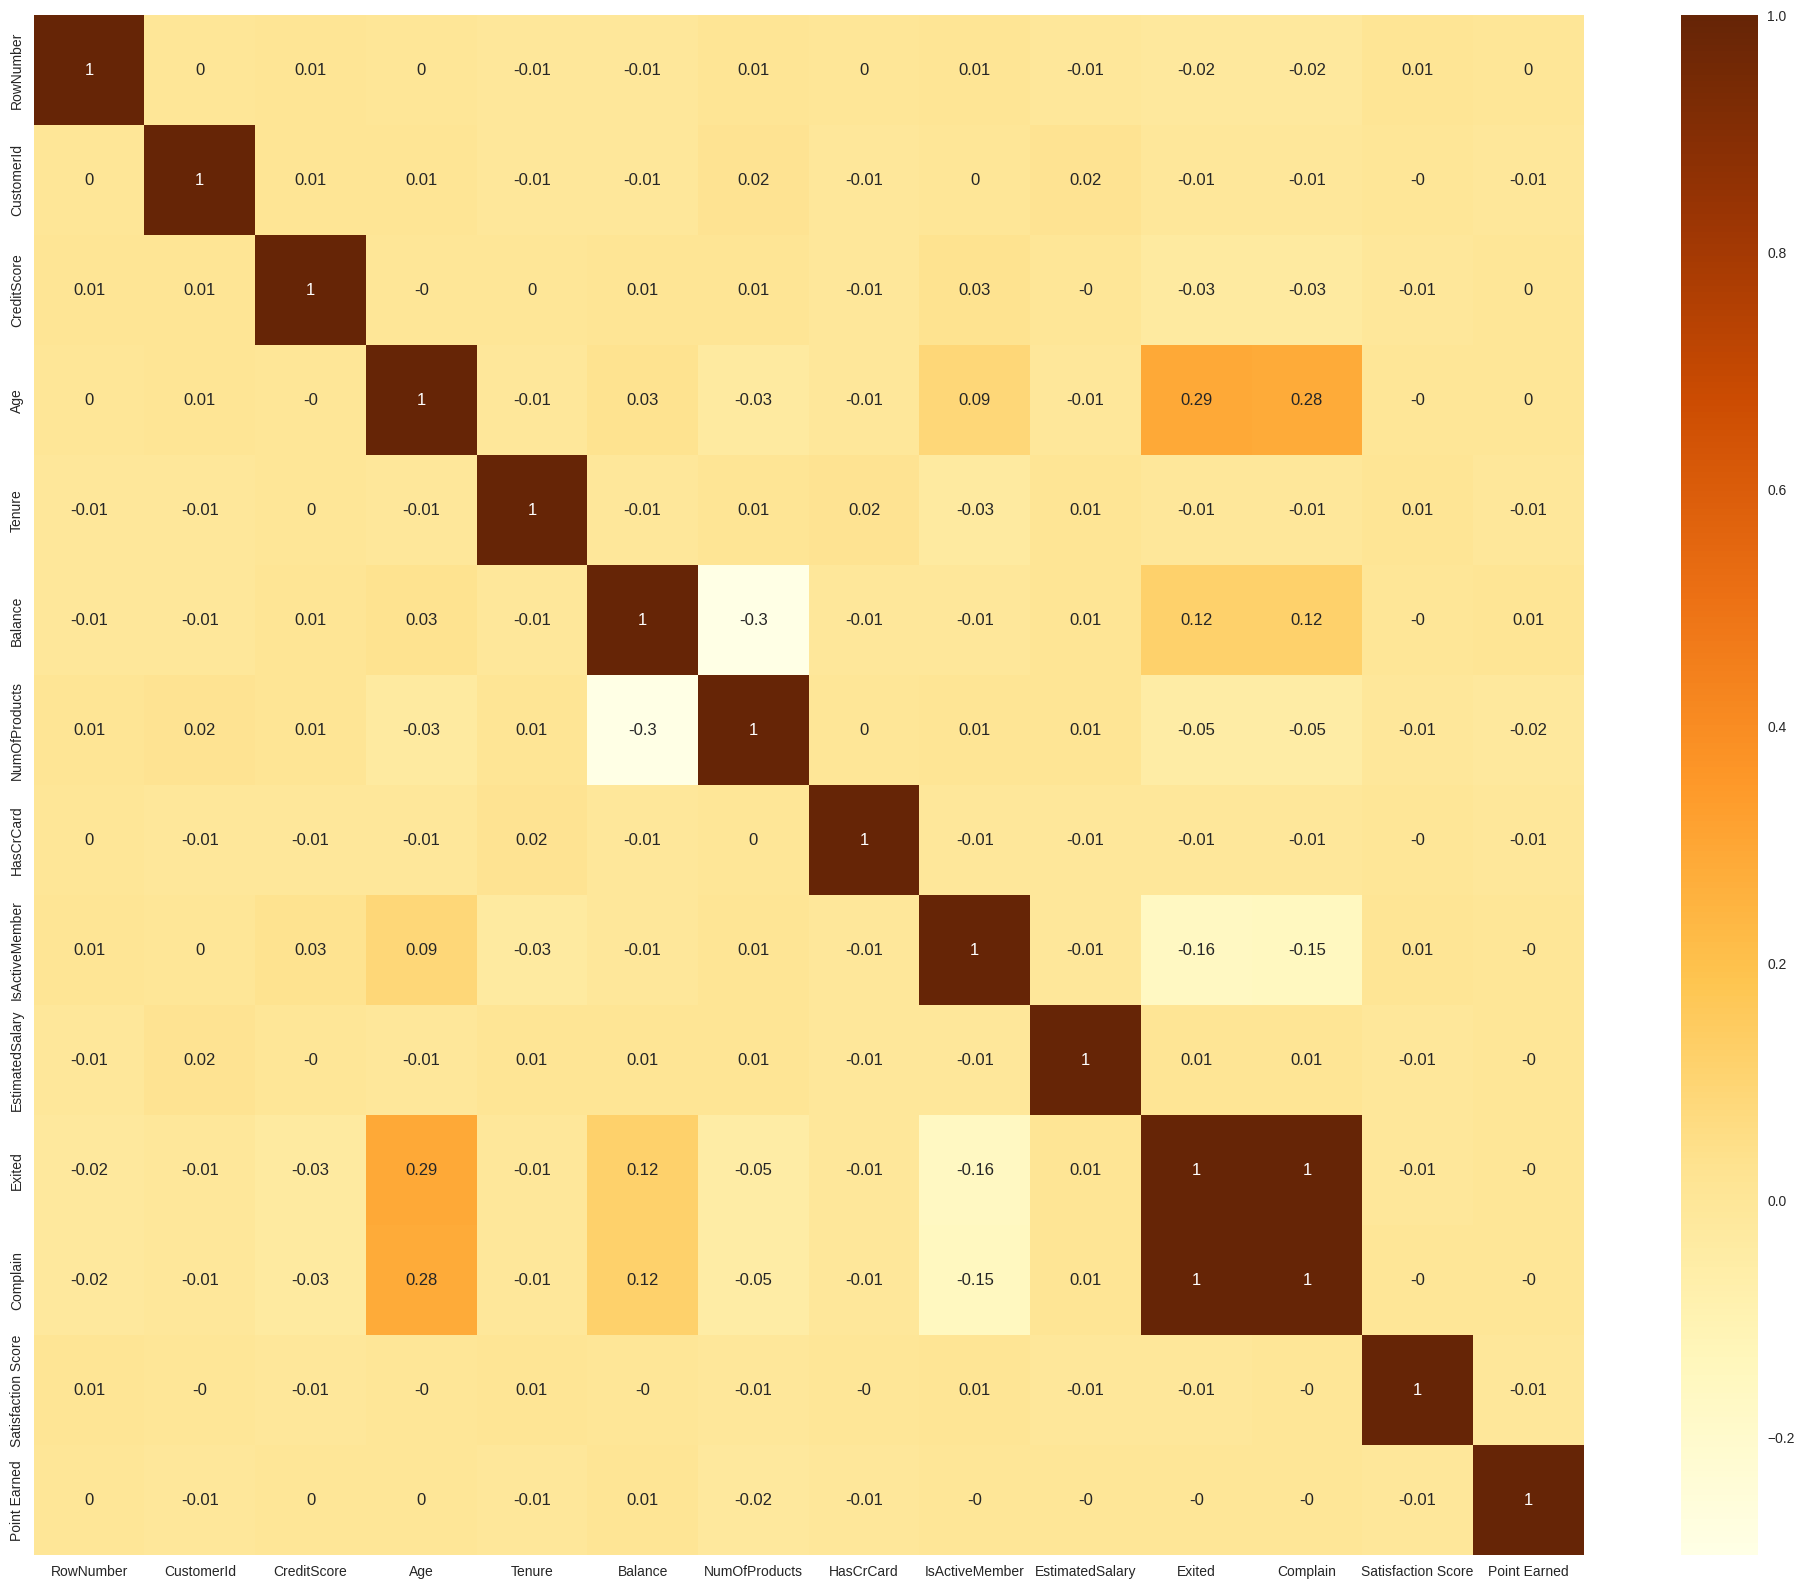

In [10]:
corr = df.corr().round(2)
plt.figure(figsize = (25,20))
sns.heatmap(corr, annot = True, cmap = 'YlOrBr')

In [101]:
df = df.drop('Complain', axis = 1)

#### Categorical Variables.

#### Khi xem xét các biến phân loại, có thể thấy hầu hết các biến đều được phân bố tốt. Khách hàng chủ yếu đến từ Pháp, biến giới tính được phân bố đồng đều, và thông thường họ sử dụng 1 hoặc 2 sản phẩm. Biến mục tiêu không được phân bố tốt, ta sẽ cần phải cân bằng các lớp.

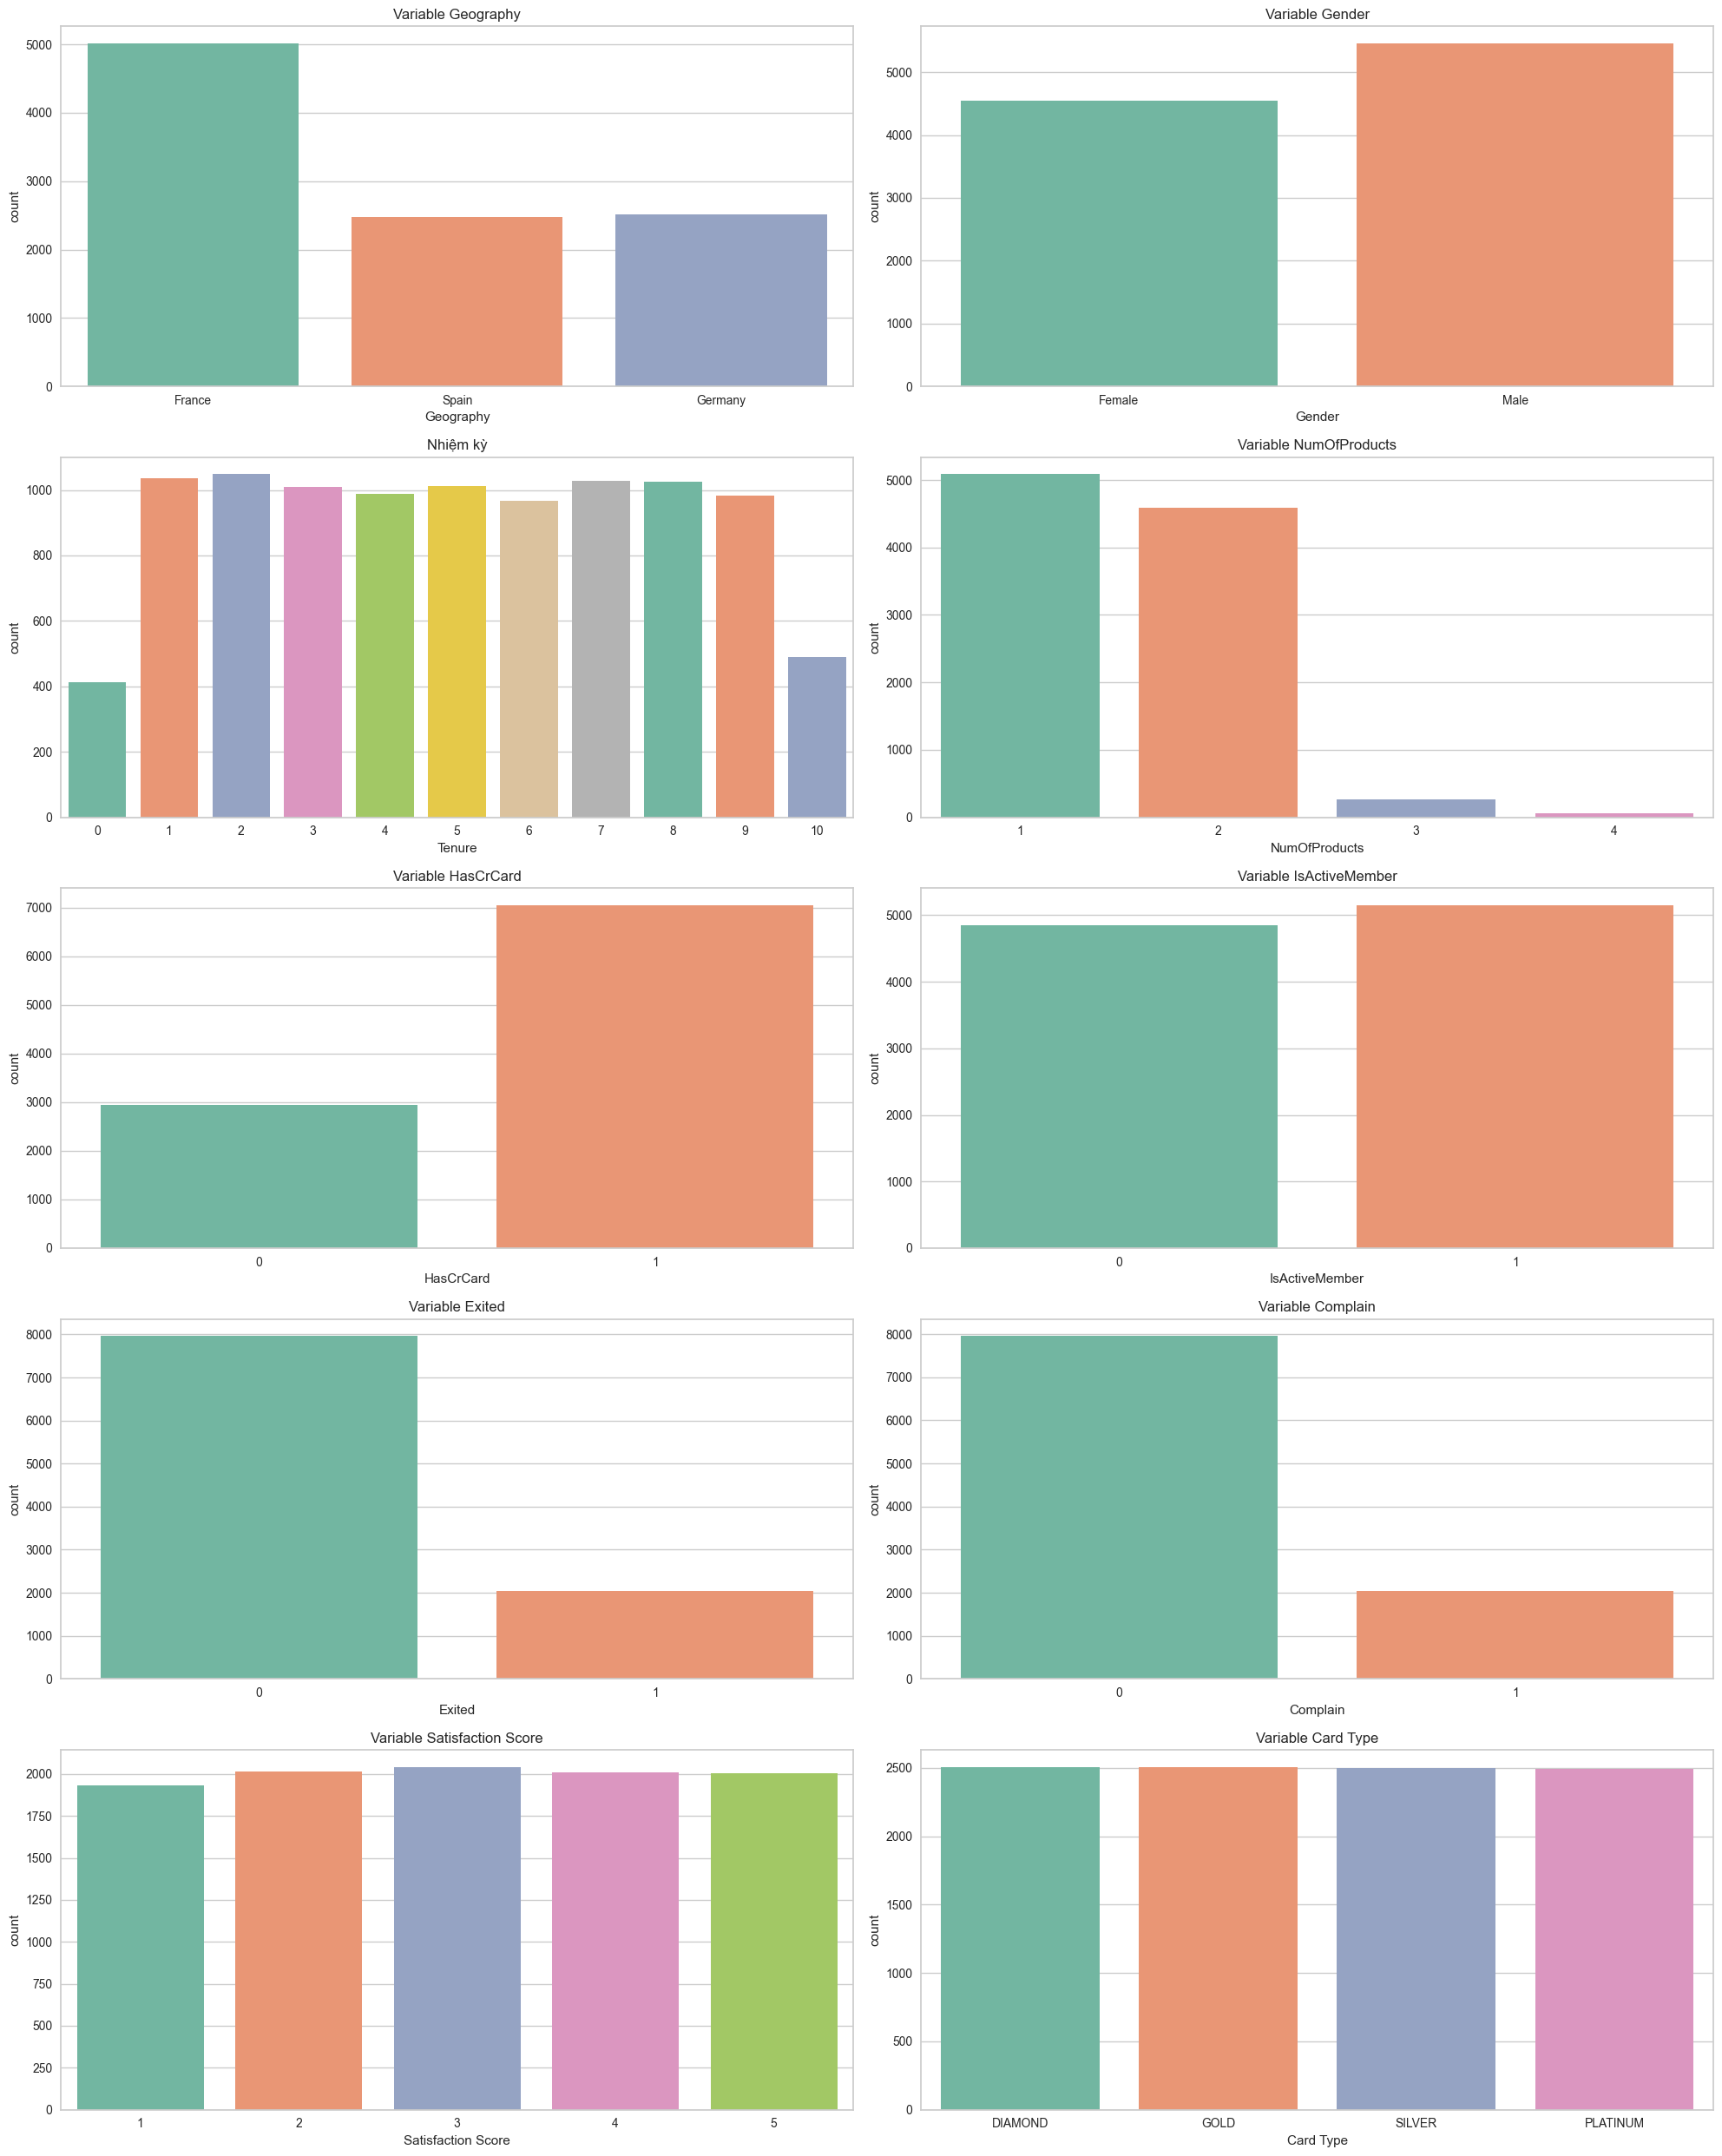

In [14]:
plt.figure(figsize=(20, 25))

plt.subplot(5, 2, 1)
plt.gca().set_title('Variable Geography')
sns.countplot(x='Geography', hue='Geography', palette='Set2', legend=False, data=df)

plt.subplot(5, 2, 2)
plt.gca().set_title('Variable Gender')
sns.countplot(x='Gender', hue='Gender', palette='Set2', legend=False, data=df)

plt.subplot(5, 2, 3)
plt.gca().set_title('Nhiệm kỳ')
sns.countplot(x='Tenure', hue='Tenure', palette='Set2', legend=False, data=df)

plt.subplot(5, 2, 4)
plt.gca().set_title('Variable NumOfProducts')
sns.countplot(x='NumOfProducts', hue='NumOfProducts', palette='Set2', legend=False, data=df)

plt.subplot(5, 2, 5)
plt.gca().set_title('Variable HasCrCard')
sns.countplot(x='HasCrCard', hue='HasCrCard', palette='Set2', legend=False, data=df)

plt.subplot(5, 2, 6)
plt.gca().set_title('Variable IsActiveMember')
sns.countplot(x='IsActiveMember', hue='IsActiveMember', palette='Set2', legend=False, data=df)

plt.subplot(5, 2, 7)
plt.gca().set_title('Variable Exited')
sns.countplot(x='Exited', hue='Exited', palette='Set2', legend=False, data=df)

plt.subplot(5, 2, 8)
plt.gca().set_title('Variable Complain')
sns.countplot(x='Complain', hue='Complain', palette='Set2', legend=False, data=df)

plt.subplot(5, 2, 9)
plt.gca().set_title('Variable Satisfaction Score')
sns.countplot(x='Satisfaction Score', hue='Satisfaction Score', palette='Set2', legend=False, data=df)

plt.subplot(5, 2, 10)
plt.gca().set_title('Variable Card Type')
sns.countplot(x='Card Type', hue='Card Type', palette='Set2', legend=False, data=df)

plt.tight_layout()
plt.show()

#### Continuous Variables.

#### Xem xét các biến liên tục hầu hết các biến đều được cân bằng tốt. Chẳng hạn biến EstimatedSalary, số lượng người ở mỗi khoảng lương gần như tương đương. Biến PointsEarned cũng thế. Khi xem xét biến CreditScore và Age, chúng gần giống nhau, phân bố không hoàn toàn chuẩn. Còn với biến Balance, phần lớn dữ liệu đến từ những người không có tiền trong tài khoản, còn những người có tiền thì được phân bố khá cân bằng.

<Axes: xlabel='Point Earned', ylabel='Count'>

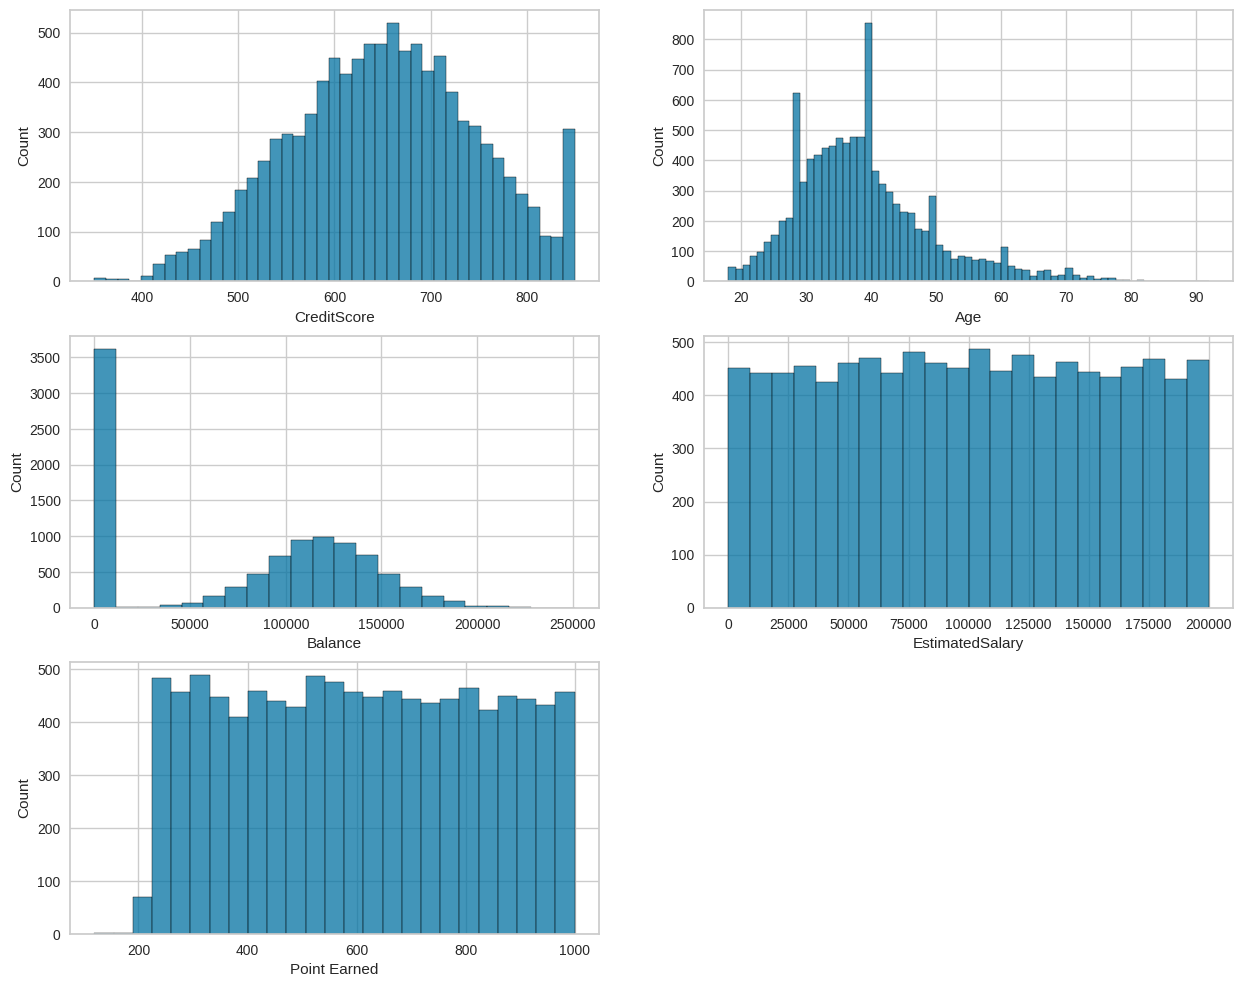

In [17]:
plt.figure(figsize = (15, 12))

plt.subplot(3, 2, 1)
sns.histplot(x = df['CreditScore'], kde = False)

plt.subplot(3, 2, 2)
sns.histplot(x = df['Age'], kde = False)

plt.subplot(3, 2, 3)
sns.histplot(x = df['Balance'], kde = False)

plt.subplot(3, 2, 4)
sns.histplot(x = df['EstimatedSalary'], kde = False)

plt.subplot(3, 2, 5)
sns.histplot(x = df['Point Earned'], kde = False)

#### Biểu đồ boxplot của các biến liên tục, có rất ít giá trị ngoại lai (outliers)

<Axes: title={'center': 'Boxplot CreditScore'}, xlabel='CreditScore'>

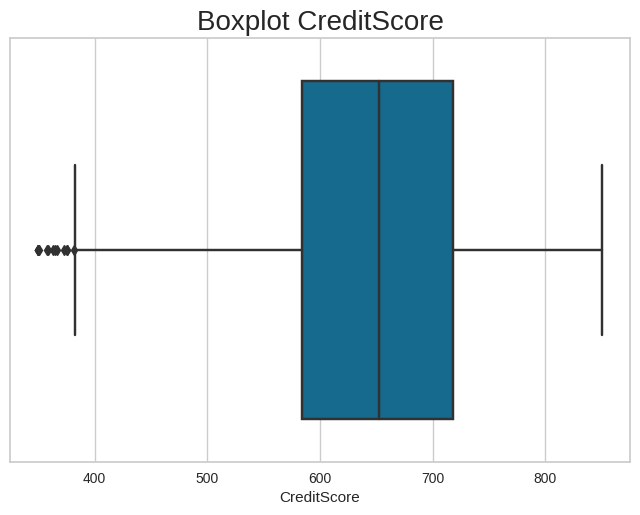

In [18]:
plt.title("Boxplot CreditScore", fontdict = {'fontsize': 20})
sns.boxplot(x=df["CreditScore"])

<Axes: title={'center': 'Boxplot Age'}, xlabel='Age'>

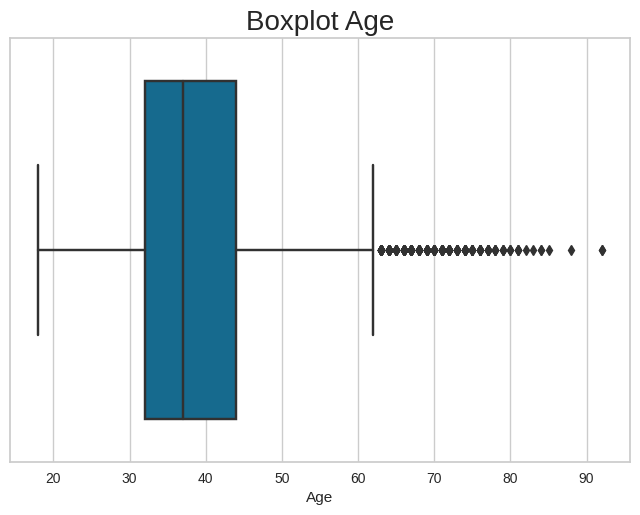

In [19]:
plt.title("Boxplot Age", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Age"])

<Axes: title={'center': 'Boxplot Balance'}, xlabel='Balance'>

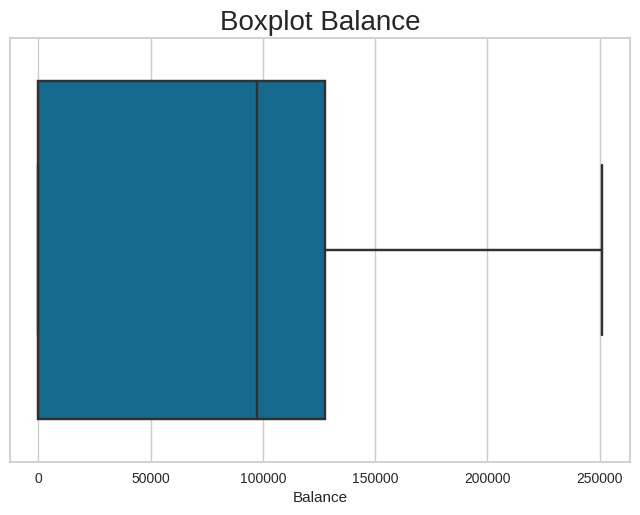

In [20]:
plt.title("Boxplot Balance", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Balance"])

<Axes: title={'center': 'Boxplot EstimatedSalary'}, xlabel='EstimatedSalary'>

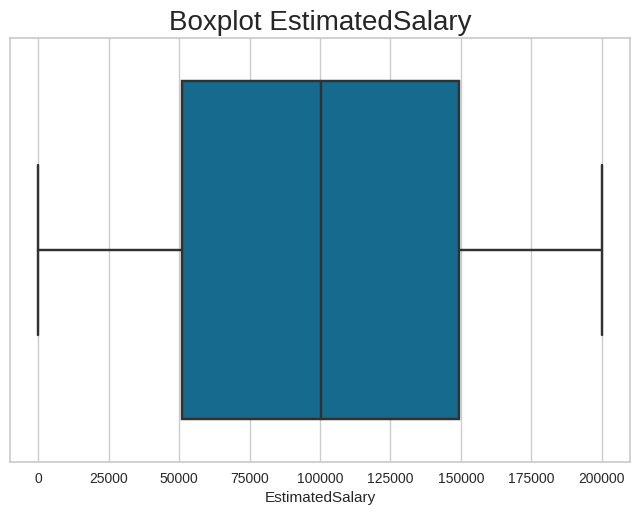

In [21]:
plt.title("Boxplot EstimatedSalary", fontdict = {'fontsize': 20})
sns.boxplot(x=df["EstimatedSalary"])

<Axes: title={'center': 'Boxplot Point Earned'}, xlabel='Point Earned'>

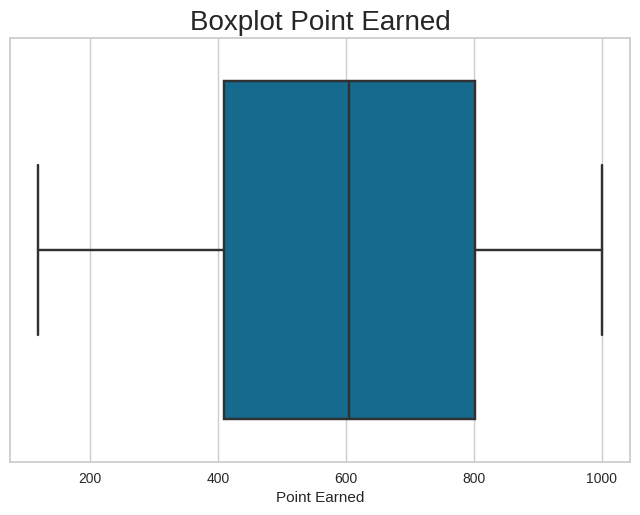

In [22]:
plt.title("Boxplot Point Earned", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Point Earned"])

#### Song biến

#### So sánh các biến phân loại với biến mục tiêu. Không thấy bất kỳ biến nào có hành vi quá khác biệt giữa kết quả tích cực và tiêu cực.

<Axes: title={'center': 'Variable Card Type'}, xlabel='Card Type', ylabel='count'>

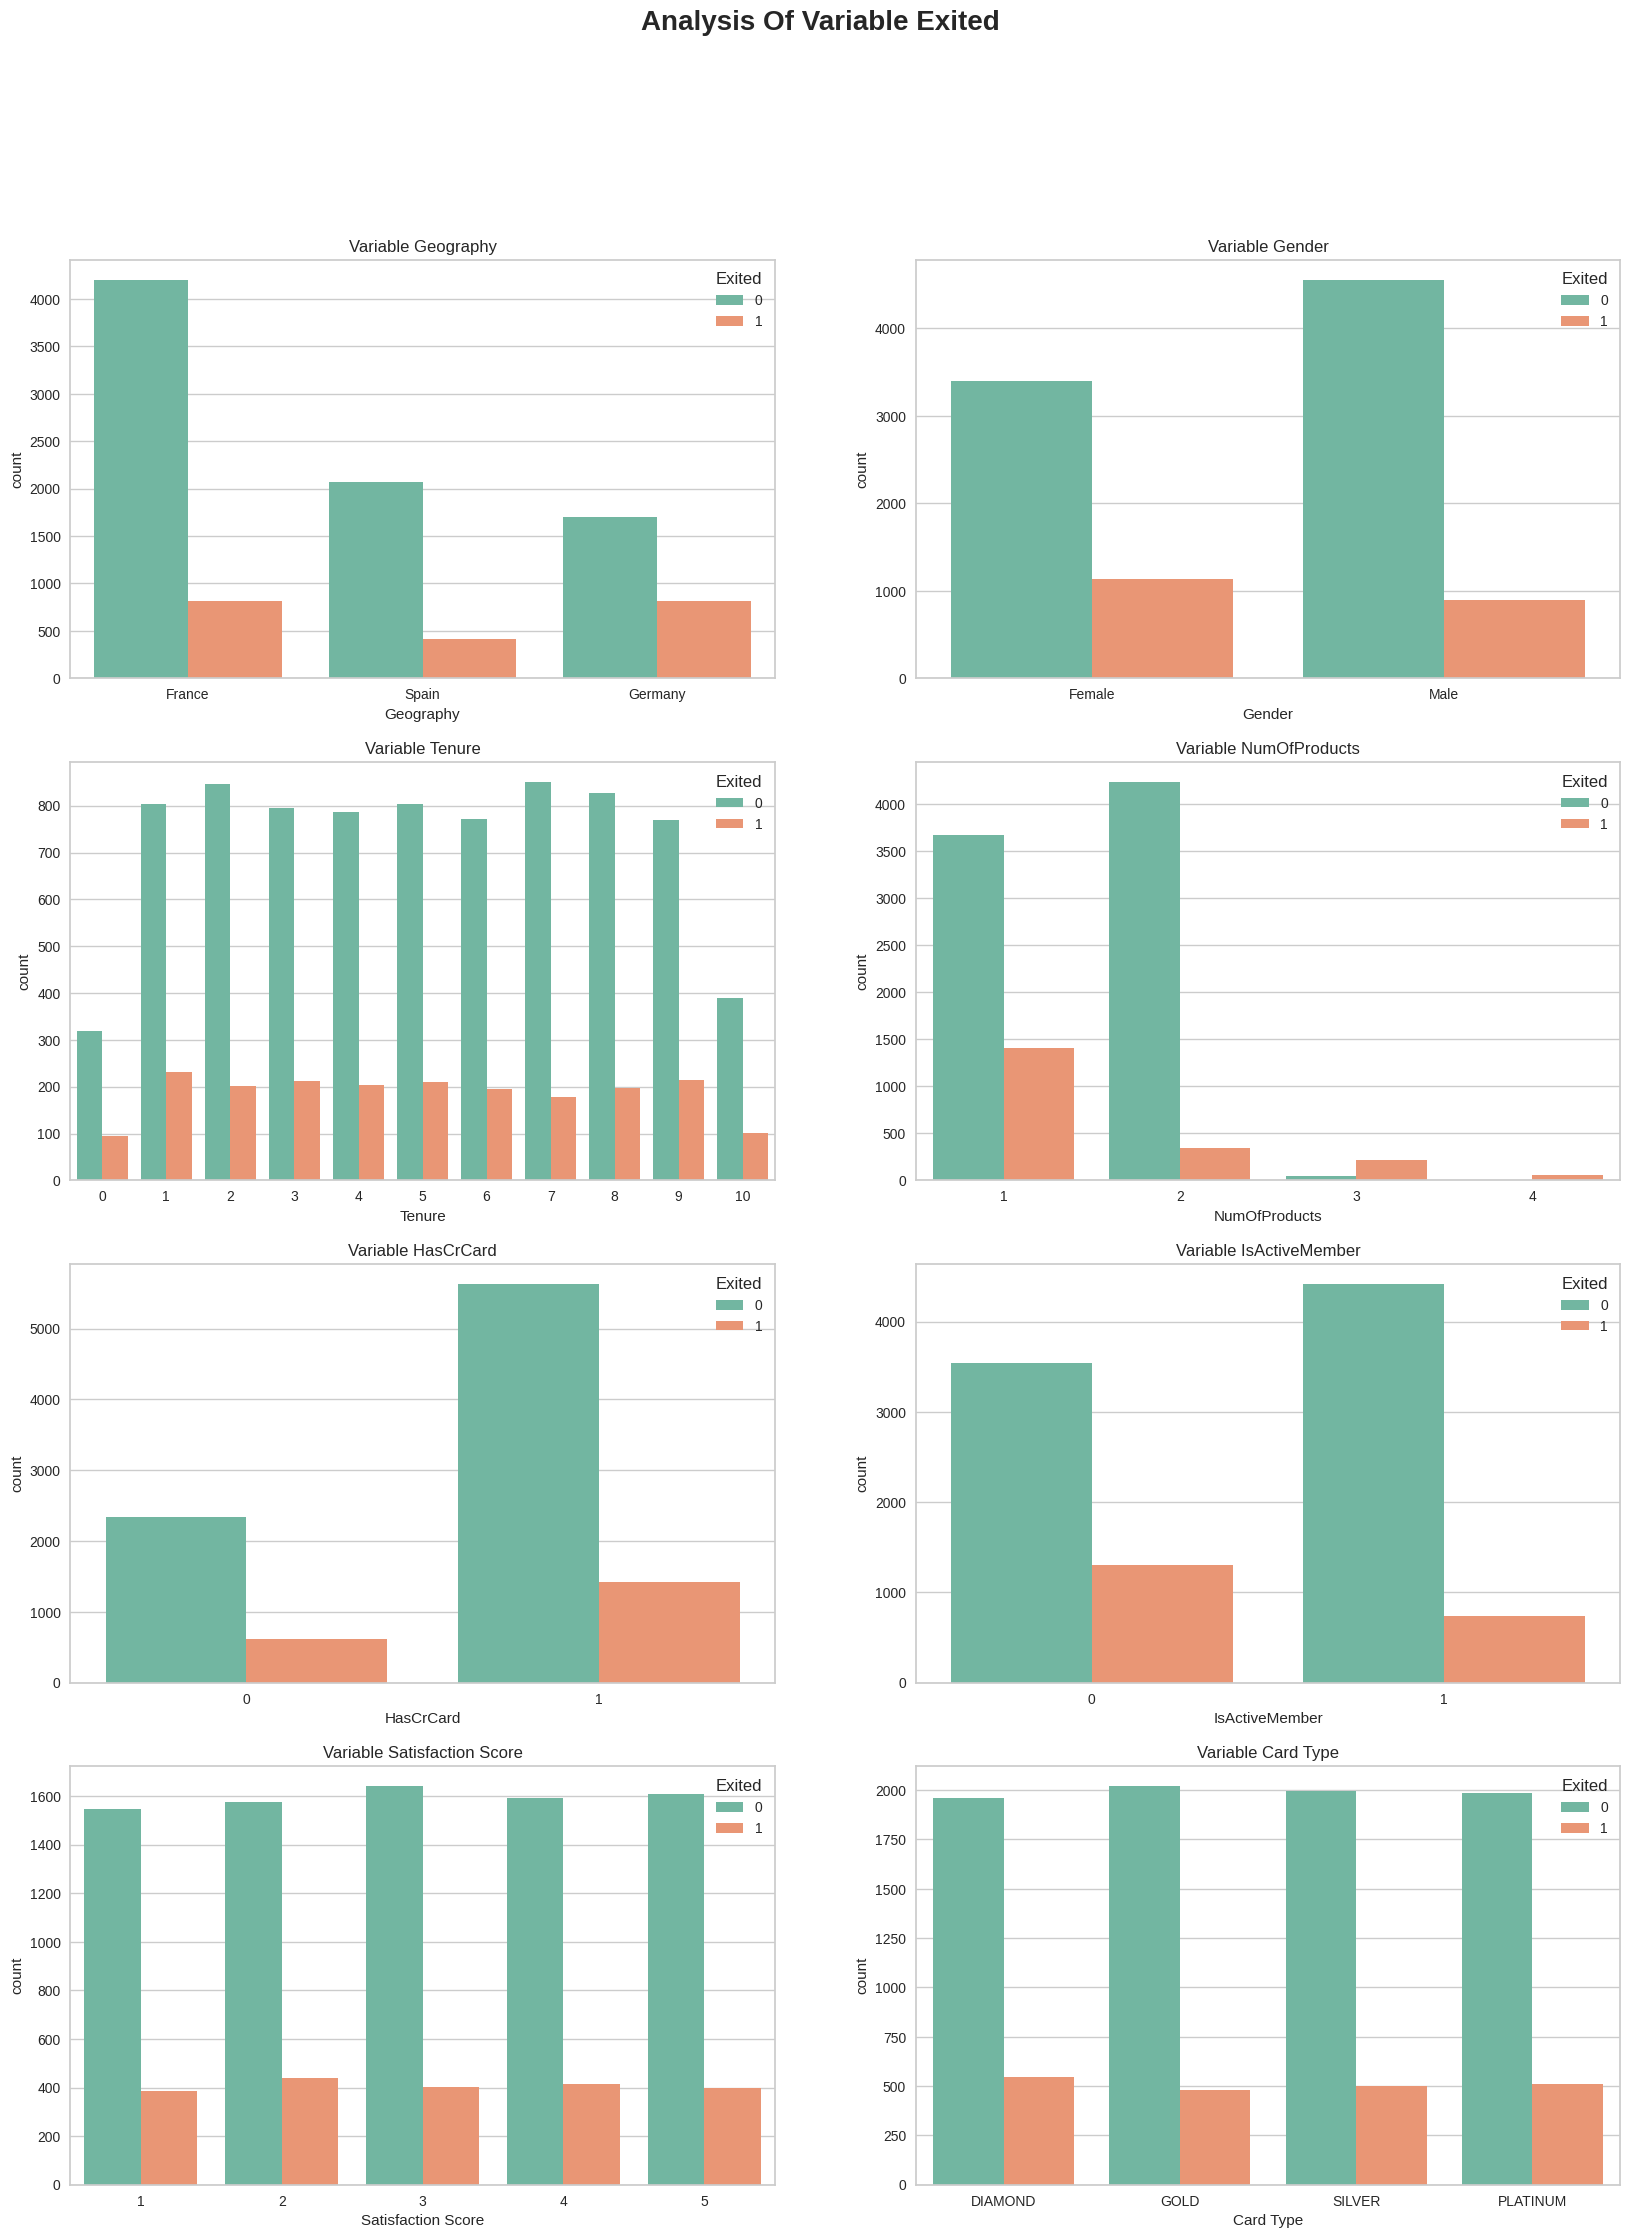

In [27]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable Exited",fontweight="bold", fontsize=20)

plt.subplot(4, 2, 1)
plt.gca().set_title('Variable Geography')
sns.countplot(x = 'Geography', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 2)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 3)
plt.gca().set_title('Variable Tenure')
sns.countplot(x = 'Tenure', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 4)
plt.gca().set_title('Variable NumOfProducts')
sns.countplot(x = 'NumOfProducts', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 5)
plt.gca().set_title('Variable HasCrCard')
sns.countplot(x = 'HasCrCard', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 6)
plt.gca().set_title('Variable IsActiveMember')
sns.countplot(x = 'IsActiveMember', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 7)
plt.gca().set_title('Variable Satisfaction Score')
sns.countplot(x = 'Satisfaction Score', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 8)
plt.gca().set_title('Variable Card Type')
sns.countplot(x = 'Card Type', hue = 'Exited', palette = 'Set2', data = df)

#### Khi xem xét các biến liên tục Age, những người lớn tuổi hơn có xu hướng cho kết quả tích cực hơn.

<Axes: xlabel='Exited', ylabel='Point Earned'>

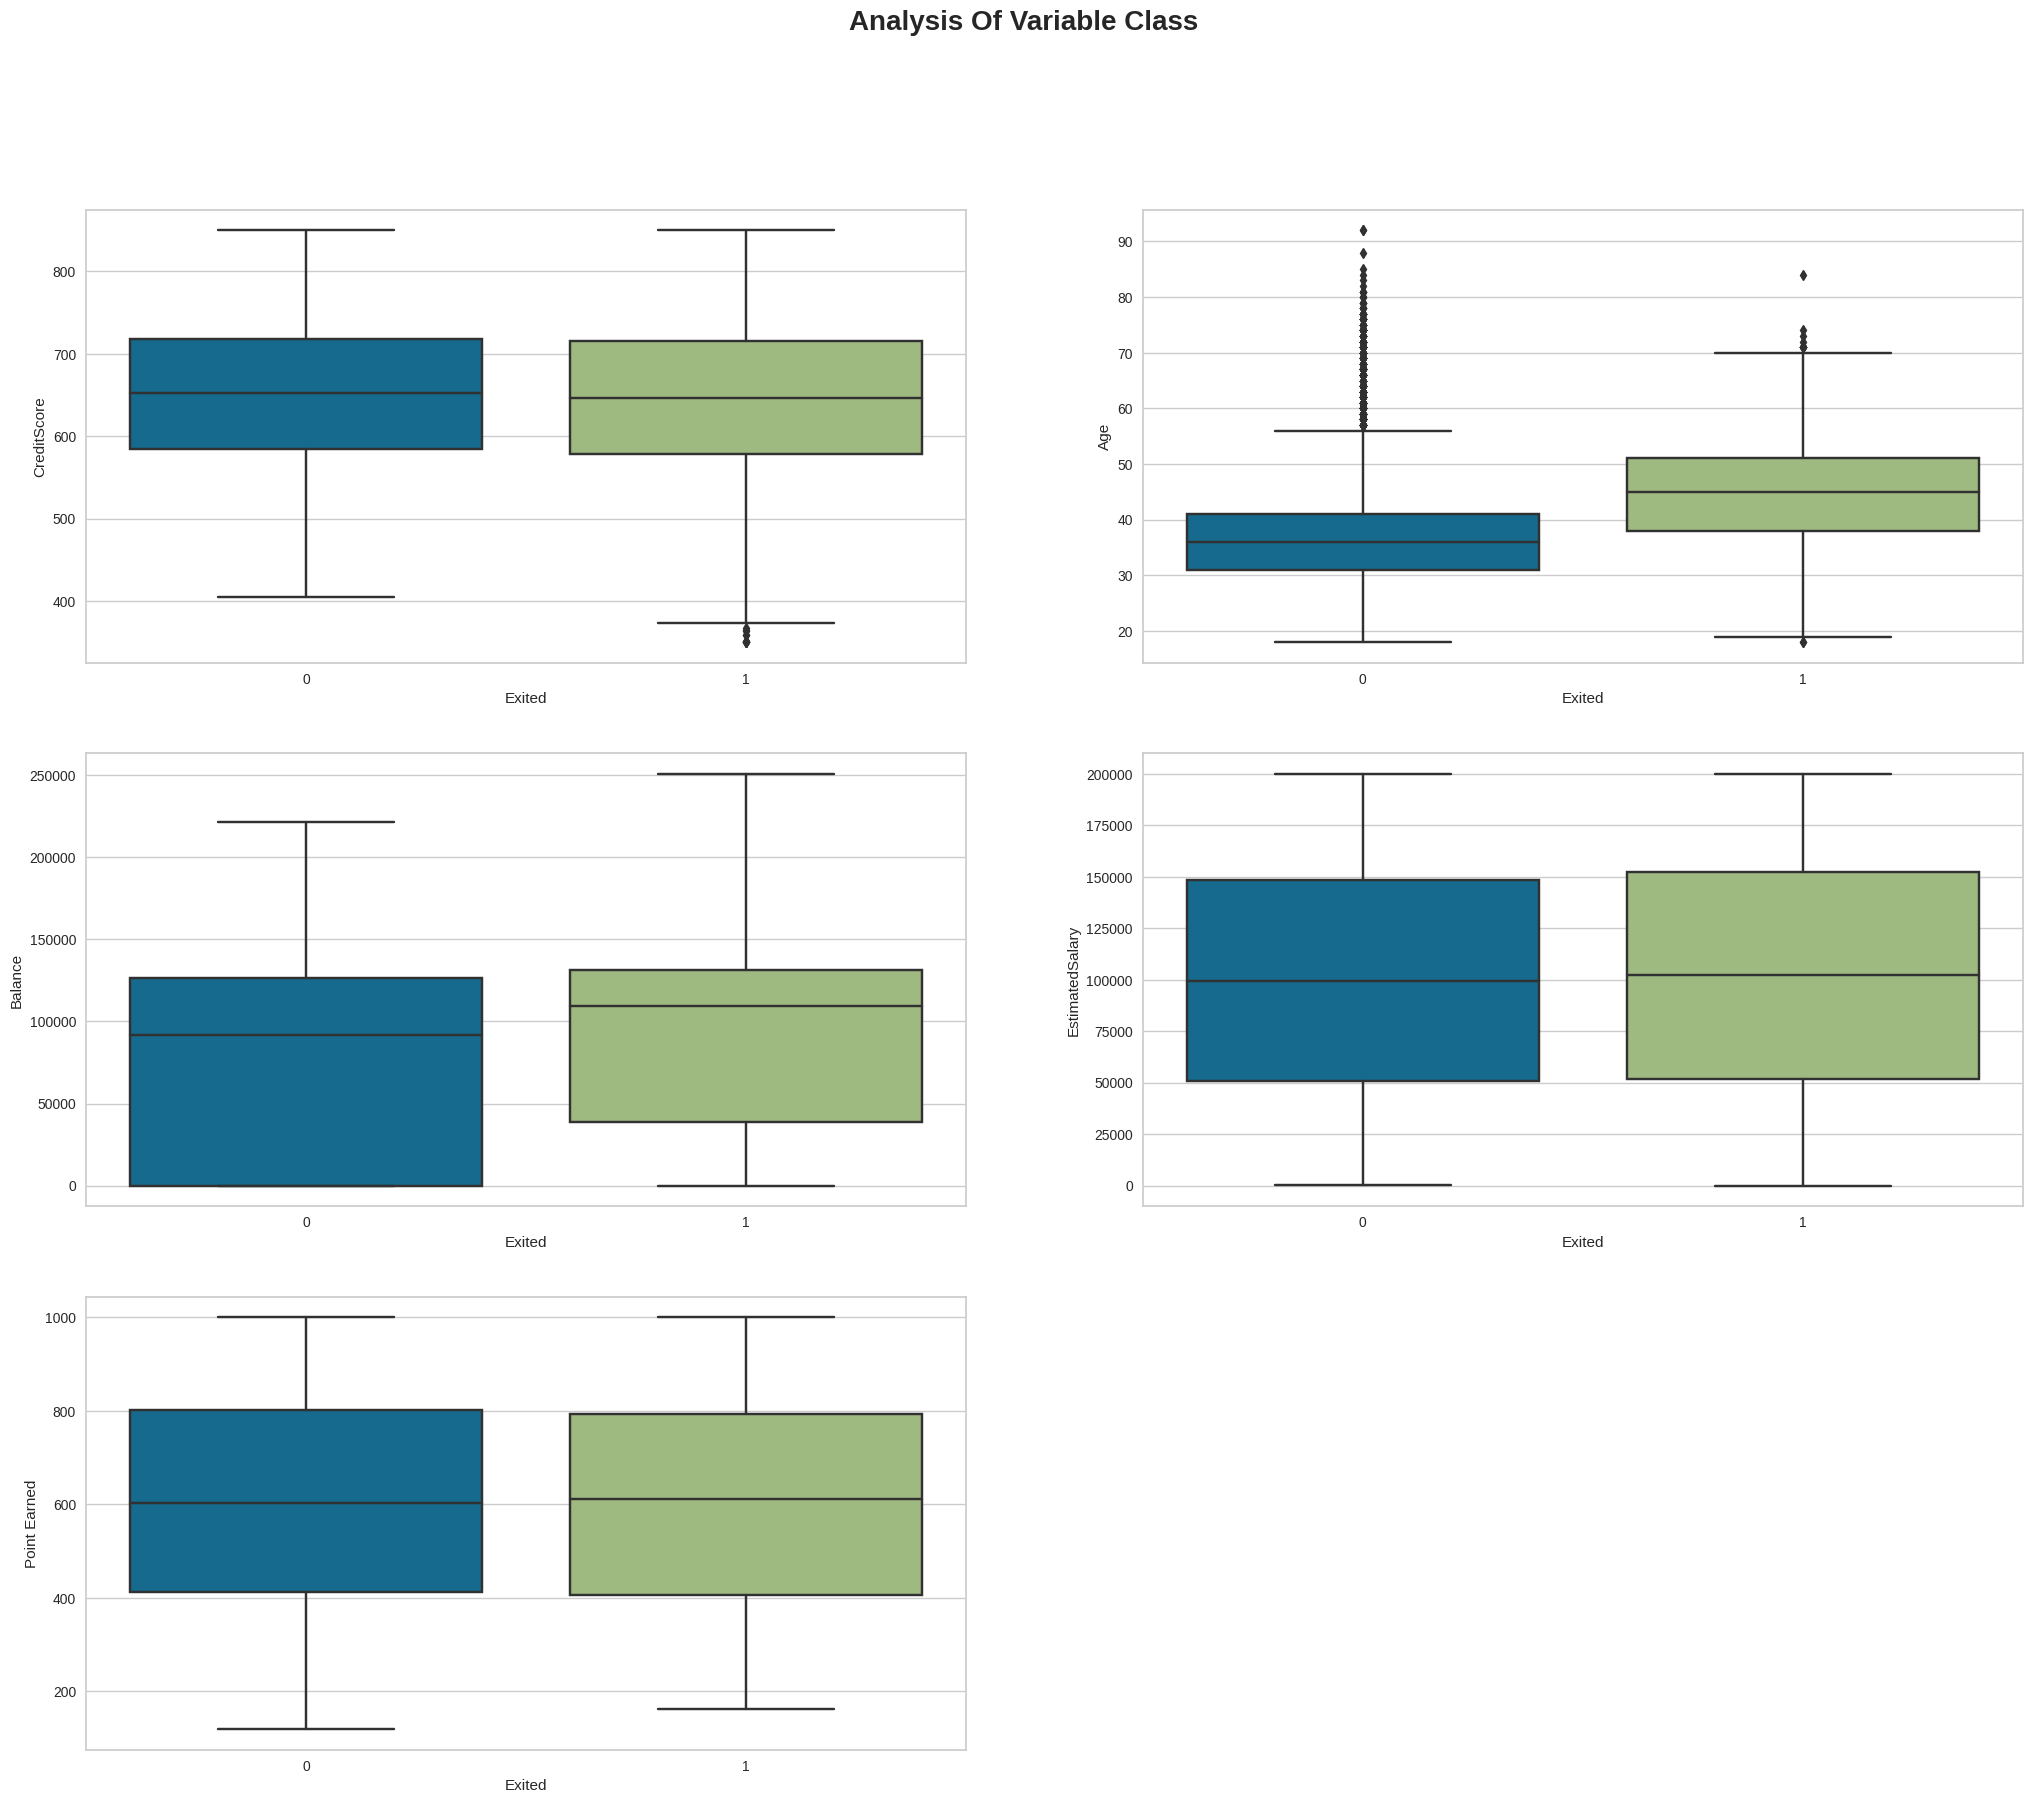

In [28]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable Class",fontweight="bold", fontsize=20)

plt.subplot(3,2,1)
sns.boxplot(x="Exited", y="CreditScore", data=df)

plt.subplot(3,2,2)
sns.boxplot(x="Exited", y="Age", data=df)

plt.subplot(3,2,3)
sns.boxplot(x="Exited", y="Balance", data=df)

plt.subplot(3,2,4)
sns.boxplot(x="Exited", y="EstimatedSalary", data=df)

plt.subplot(3,2,5)
sns.boxplot(x="Exited", y="Point Earned", data=df)

## 3. Model Building

#### Loại bỏ RowNumber, CustomerID và Surname

In [102]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

#### OneHot Label Encoder
- Chuyển đổi biến phân loại thành biến liên tục

In [104]:
hot = pd.get_dummies(df[['Geography', 'Gender', 'Card Type']])

In [105]:
df = pd.concat([df, hot], axis = 1)
df = df.drop(['Geography', 'Gender', 'Card Type'], axis = 1)

#### Tách các features và target

In [107]:
X = df.drop('Exited', axis = 1)
X = X.values
y = df['Exited']

#### StandardScaler

In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [130]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)

#### Balancing Classes
- Vì có nhiều giá trị thuộc về một lớp và ít giá trị thuộc về các lớp khác, nên sẽ cân bằng các lớp bằng cách sử dụng OverSampling để đảm bảo các lớp được cân bằng

In [131]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

#### Naive Bayes
#### Chạy Gaussian Model.
- Sử dụng Naive Bayes Model, sẽ test Gaussian model, sử dụng Normal Data.

#### Trong model đầu tiên kết quả không thực sự tốt, chỉ đạt được độ chính xác 70,46%, mức này khá ổn

0.7046666666666667

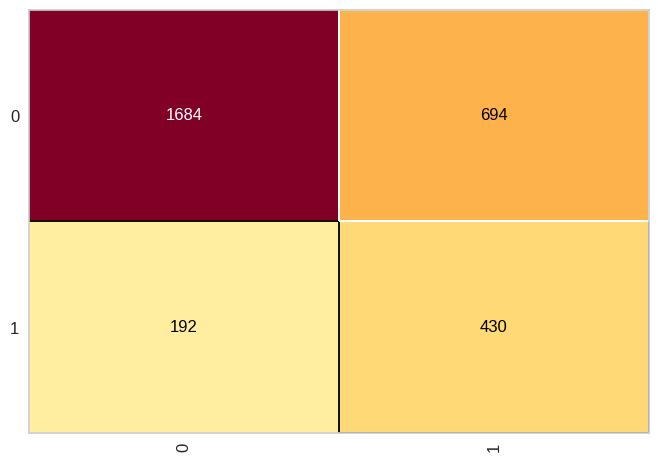

In [113]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(X_test)

cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [46]:
classification_naive_gaussian = (classification_report(y_test, previsoes))
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      2378
           1       0.38      0.70      0.49       622

    accuracy                           0.70      3000
   macro avg       0.64      0.70      0.64      3000
weighted avg       0.79      0.70      0.73      3000



In [145]:
score_naive_gaussian = 0.7046666666666667

#### Decision Tree
- Sử dụng Decision Tree Model, sẽ test tính Entropy với cả Gini
- Áp dụng GridSearch để check xem metrics nào tốt nhất

In [114]:
parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = DecisionTreeClassifier()
gridDecisionTree = RandomizedSearchCV(model, parameters, cv = 3, n_jobs = -1)
gridDecisionTree.fit(X_train, y_train)

print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  2
Max Nvl:  11
Algorithm:  entropy
Score:  0.8383778814365335


#### Running Decision Tree.

0.7663333333333333

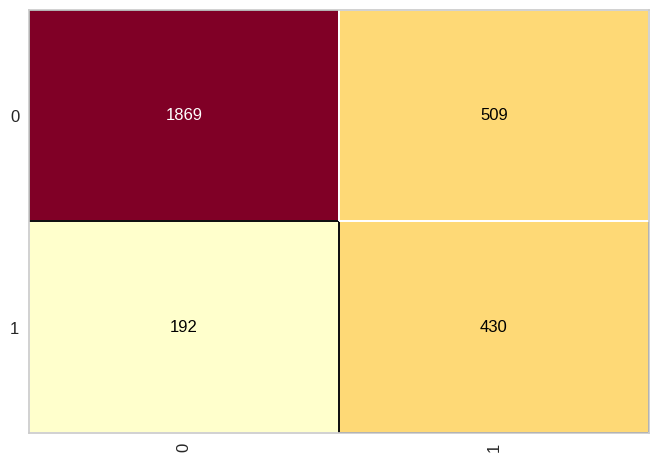

In [115]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 2, max_depth= 11, random_state=0)
decision_tree.fit(X_train, y_train)
previsoes = decision_tree.predict(X_test)

cm = ConfusionMatrix(decision_tree)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [50]:
classification_decision = (classification_report(y_test, previsoes))
print(classification_decision)

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      2378
           1       0.44      0.70      0.55       622

    accuracy                           0.76      3000
   macro avg       0.68      0.74      0.69      3000
weighted avg       0.81      0.76      0.77      3000



In [146]:
score_tree = 0.7663333333333333

#### Check các biến quan trọng của model

In [116]:
columns = df.drop('Exited', axis = 1).columns
feature_imp = pd.Series(decision_tree.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp

Age                   0.281124
NumOfProducts         0.176855
Balance               0.131615
EstimatedSalary       0.088956
Point Earned          0.075437
CreditScore           0.066963
Tenure                0.043370
IsActiveMember        0.041642
Geography_Germany     0.029502
Satisfaction Score    0.016569
Gender_Male           0.014114
Geography_Spain       0.007206
Card Type_GOLD        0.006539
Gender_Female         0.006416
Card Type_SILVER      0.006183
Card Type_PLATINUM    0.002321
Geography_France      0.002231
Card Type_DIAMOND     0.001523
HasCrCard             0.001435
dtype: float64

#### RandomForest
- Sử dụng Random Forest Model, sẽ test tính Entropy với cả Gini
- Áp dụng GridSearch

In [117]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = RandomForestClassifier()
gridRandomForest = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1)
gridRandomForest.fit(X_train, y_train)

print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Mín Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max Nvl: ', gridRandomForest.best_estimator_.max_depth)

Algorithm:  gini
Score:  0.894162719939894
Mín Split:  7
Max Nvl:  11


#### Running Random Forest.

0.8363333333333334

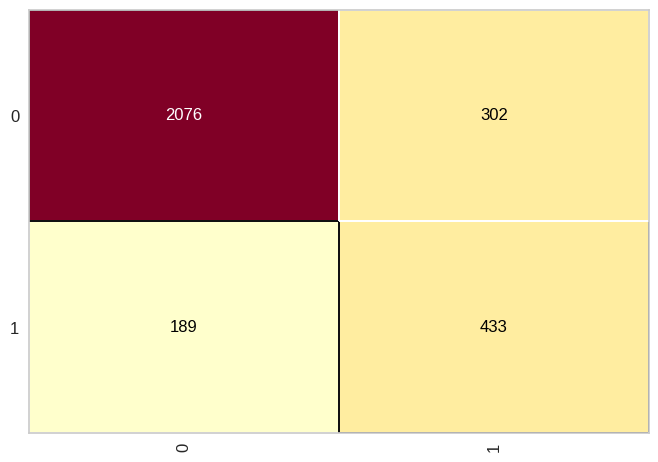

In [118]:
random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 7, max_depth= 11,  criterion = 'entropy', random_state = 0)
random_forest.fit(X_train, y_train)
previsoes = random_forest.predict(X_test)

cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [55]:
classification_random = (classification_report(y_test, previsoes))
print(classification_random)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      2378
           1       0.57      0.69      0.62       622

    accuracy                           0.83      3000
   macro avg       0.74      0.78      0.76      3000
weighted avg       0.84      0.83      0.83      3000



In [147]:
score_random = 0.8363333333333334

#### Check các biến quan trọng

In [57]:
feature_imp_random = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_random

Age                   0.265960
NumOfProducts         0.188624
Balance               0.103863
EstimatedSalary       0.080203
CreditScore           0.079517
Point Earned          0.078587
Tenure                0.044444
IsActiveMember        0.039528
Geography             0.036864
Satisfaction Score    0.028516
Card Type             0.023570
Gender                0.020407
HasCrCard             0.009916
dtype: float64

#### Extra Trees
- Sử dụng Extra Trees Model, sẽ test tính Entropy với cả Gini
- Áp dụng GridSearch

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = ExtraTreesClassifier()
gridExtraTrees = RandomizedSearchCV(model, parameters, cv = 3, n_jobs = -1)
gridExtraTrees.fit(X_train, y_train)

print('Algorithm: ', gridExtraTrees.best_estimator_.criterion)
print('Score: ', gridExtraTrees.best_score_)
print('Mín Split: ', gridExtraTrees.best_estimator_.min_samples_split)
print('Max Nvl: ', gridExtraTrees.best_estimator_.max_depth)

Algorithm:  entropy
Score:  0.8757160577592784
Mín Split:  4
Max Nvl:  11


#### Running Extra Trees.

0.8206666666666667

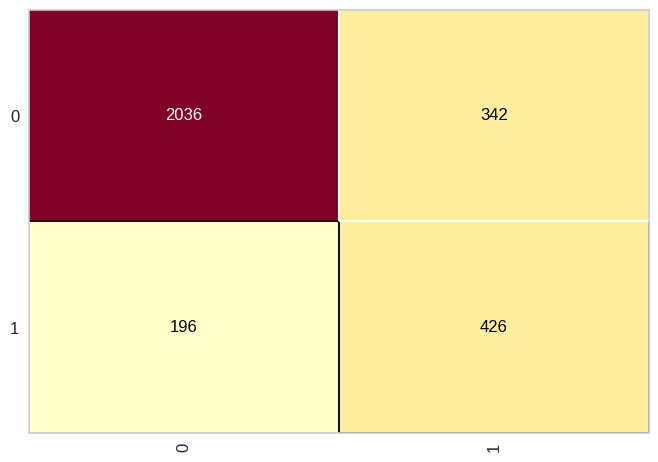

In [120]:
extra_trees = ExtraTreesClassifier(n_estimators = 100, min_samples_split = 4, max_depth= 11, criterion = 'entropy', random_state = 0)
extra_trees.fit(X_train, y_train)
previsoes = extra_trees.predict(X_test)

cm = ConfusionMatrix(extra_trees)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [60]:
classification_extra = (classification_report(y_test, previsoes))
print(classification_extra)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      2378
           1       0.56      0.70      0.62       622

    accuracy                           0.83      3000
   macro avg       0.74      0.78      0.75      3000
weighted avg       0.84      0.83      0.83      3000



In [148]:
score_extra = 0.8206666666666667

#### K-Means

In [121]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2, random_state= 0)
model.fit(X_train)
previsoes = model.predict(X_test)
classification_kmeans_standard = (accuracy_score(y_test, previsoes))
print(classification_kmeans_standard)

0.545


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [149]:
score_kmeans = 0.545

#### K-Neighbors
- Dùng GridSearch

In [122]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

k_list = list(range(1,10))
k_values = dict(n_neighbors = k_list)
grid = GridSearchCV(knn, k_values, cv = 2, scoring = 'accuracy', n_jobs = -1)
grid.fit(X_train, y_train)


grid.best_params_, grid.best_score_

({'n_neighbors': 1}, 0.8207378223495703)

#### Running K-Neighbors.

0.671

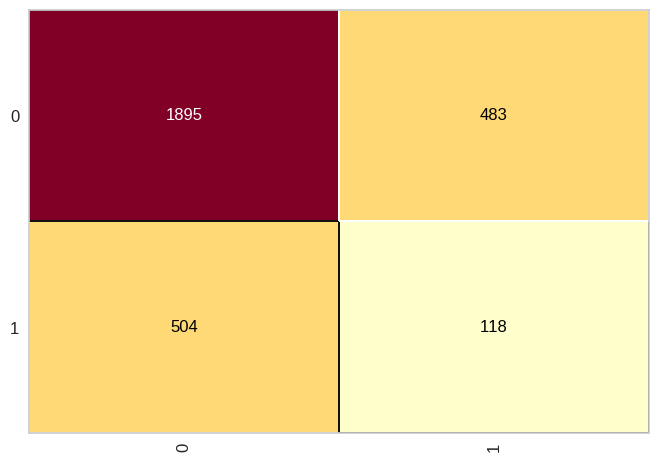

In [123]:
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
previsoes = knn.predict(X_test)

cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [67]:
classification_knn = (classification_report(y_test, previsoes))
print(classification_knn)

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      2378
           1       0.20      0.19      0.19       622

    accuracy                           0.67      3000
   macro avg       0.49      0.49      0.49      3000
weighted avg       0.67      0.67      0.67      3000



In [150]:
score_knn = 0.671

#### Logistic Regression

0.6576666666666666

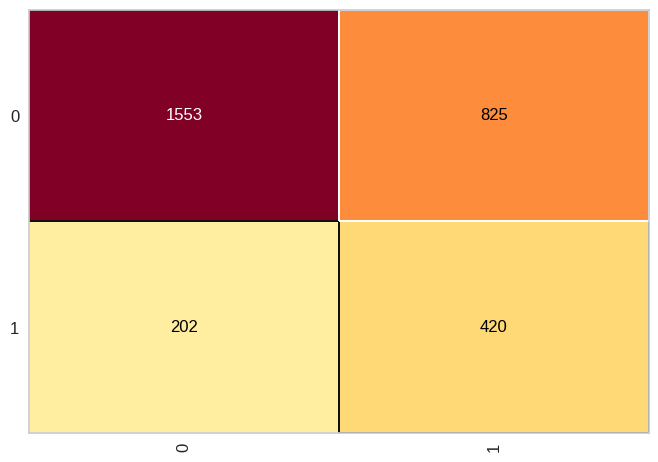

In [124]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 1, max_iter=1000)
logistic.fit(X_train, y_train)
previsoes = logistic.predict(X_test)

cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [70]:
logistic_normal = (classification_report(y_test, previsoes))
print(logistic_normal)

              precision    recall  f1-score   support

           0       0.89      0.64      0.74      2378
           1       0.33      0.69      0.45       622

    accuracy                           0.65      3000
   macro avg       0.61      0.66      0.60      3000
weighted avg       0.77      0.65      0.68      3000



In [151]:
logistic_normal = 0.6576666666666666

#### Decision Tree.

In [140]:
feature_imp

Age                   0.281124
NumOfProducts         0.176855
Balance               0.131615
EstimatedSalary       0.088956
Point Earned          0.075437
CreditScore           0.066963
Tenure                0.043370
IsActiveMember        0.041642
Geography_Germany     0.029502
Satisfaction Score    0.016569
Gender_Male           0.014114
Geography_Spain       0.007206
Card Type_GOLD        0.006539
Gender_Female         0.006416
Card Type_SILVER      0.006183
Card Type_PLATINUM    0.002321
Geography_France      0.002231
Card Type_DIAMOND     0.001523
HasCrCard             0.001435
dtype: float64

#### Random Forest.

In [141]:
feature_imp_random

Age                   0.265960
NumOfProducts         0.188624
Balance               0.103863
EstimatedSalary       0.080203
CreditScore           0.079517
Point Earned          0.078587
Tenure                0.044444
IsActiveMember        0.039528
Geography             0.036864
Satisfaction Score    0.028516
Card Type             0.023570
Gender                0.020407
HasCrCard             0.009916
dtype: float64

#### Checking the results.

In [ ]:
Naive_dict_v1 = {'Model':'Naive Bayes',
               'Scaling':'Normal Data',
               'Type':'Gaussian',
               'Precision':score_naive_gaussian}

Decision_dict = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_tree}

Random_dict = {'Model':'Random Forest',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_random}

Extra_dict = {'Model':'Extra Trees',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_extra}

K_Means_dict_v2 = {'Model':'Means',
               'Scaling':'Normal',
               'Type':'-',
               'Precision':score_kmeans}

KNN_dict_v2 = {'Model':'KNN',
               'Scaling':'Normal',
               'Type':'-',
               'Precision':score_knn}

Logistic_dict_v1 = {'Model':'Logistic Regression',
               'Scaling':'Normal Data',
               'Type':'-',
               'Precision':logistic_normal}


resume = pd.DataFrame({'Naive Bayes':pd.Series(Naive_dict_v1),
                       'Decision Tree':pd.Series(Decision_dict),
                       'Random Forest':pd.Series(Random_dict),
                       'Extra Trees':pd.Series(Extra_dict),
                       'K-Means':pd.Series(K_Means_dict_v2),
                       'KNN':pd.Series(KNN_dict_v2),
                       'Logistic Regression':pd.Series(Logistic_dict_v1)
                      })

resume

,Naive Bayes,Decision Tree,Random Forest,Extra Trees,K-Means,KNN,Logistic Regression,AdaBoost,GradientBoosting,XGB,LGBM
Model,Naive Bayes,Decision Tree,Random Forest,Extra Trees,Means,KNN,Logistic Regression,AdaBoost,GradientBoost,XGB,LGBM
Scaling,Normal Data,Normal Data,Normal Data,Normal Data,Normal,Normal,Normal Data,StandardScaler,StandardScaler,StandardScaler,StandardScaler
Type,Gaussian,Gini,Gini,Gini,-,-,-,-,-,-,-
Precision,0.704667,0.766333,0.836333,0.820667,0.545,0.671,0.657667,0.78,0.813333,0.825333,0.816667


## 4. Conclusion

#### Nhìn vào dữ liệu thì thấy tuy có nhiều cột với kha khá thông tin, nhưng số khách hàng lại không nhiều lắm, chỉ có 10.000 dữ liệu với 18 cột thôi. Dữ liệu có cả biến phân loại lẫn biến liên tục. May là không có giá trị trống nào, nên khỏi cần xử lý thêm

#### Nói về phân tích dữ liệu, thấy biến Complain liên quan chặt chẽ với biến mục tiêu, nên quyết định bỏ nó ra để chạy mô hình cho dễ. Qua phân tích khám phá, dữ liệu phân bố cũng ổn, có vài điểm đáng chú ý: đa số khách hàng từ Pháp, thường mua 1-2 sản phẩm, nhiều người không có tiền trong tài khoản, tuổi khách hàng thì phân bố chuẩn. Quan trọng là biến mục tiêu bị lệch, không cân bằng

#### Có vài giá trị ngoại lai nhỏ, nhưng không đáng lo, chẳng ảnh hưởng gì nhiều. Xem phân tích hai biến thì thấy biến Age nổi bật. Người lớn tuổi hơn thường dễ rời bỏ hơn

#### Sang training, loại bớt mấy biến không cần thiết. Biến phân loại được đổi sang biến liên tục bằng OneHot Label Encoder – dùng cái này tốt hơn Label Encoder. Chia dữ liệu thành 70% để huấn luyện, 30% để kiểm tra. Như đã nói, biến mục tiêu không cân bằng, chạy mô hình xong mới thấy rõ. Không cân bằng dữ liệu thì kết quả cũng ổn, nhưng mô hình chỉ học được trường hợp không rời bỏ, chứ không phải cái cần tìm

#### Sau khi cân bằng biến mục tiêu rồi chạy lại mô hình, kết quả có cái tốt, cái chưa tốt. Phần lớn mô hình học được cả kết quả tích cực lẫn tiêu cực, nhưng vài cái chỉ học được tiêu cực, không trúng mục tiêu. Về độ chính xác, Random Forest dẫn đầu với 83,63%. Nhưng để dự đoán biến mục tiêu thì Ada Boost ngon hơn, đạt 78% độ chính xác, mà dự đoán rời bỏ thì chuẩn hơn hẳn

#### Xem mấy biến quan trọng thì có Age, NumOfProducts, Balance, trong đó Age đứng đầu, đúng như những gì thấy lúc phân tích khám phá